In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.

Upload a CSV file to Colab:
You can use the Colab file upload interface:

In [2]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_data (1).csv to cleaned_data (1) (1).csv


Load the data using Pandas:

In [3]:
import pandas as pd

# Assuming the uploaded file is named 'data.csv'
data = pd.read_csv('/content/cleaned_data (1).csv')


Set up PyCaret:
Initialize the PyCaret setup. For example, if you're working on a classification problem and your target variable is named target, you can set up PyCaret as follows:

In [4]:
print(data.columns)


Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'frequency_of_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'SMOKE', 'CH2O',
       'calories_consumption_monitoring', 'physical_activity_frequency',
       'time_using_technology_devices', 'consumption_of_alcohol',
       'transportation_used', 'obesity_level'],
      dtype='object')


In [5]:
from pycaret.classification import setup, compare_models

# Use the correct column name found from the previous step
target_column = 'obesity_level'  # Replace with the correct column name
clf_setup = setup(data=data, target=target_column)

# Compare models
best_model = compare_models()

# Optional: View the best model
print(best_model)


,Description,Value
0,Session id,1090
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4999, 27)"
6,Transformed train set shape,"(3499, 27)"
7,Transformed test set shape,"(1500, 27)"
8,Numeric features,9
9,Categorical features,8


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8943,0.9870,0.8943,0.8950,0.8937,0.8761,0.8763,0.9710
lightgbm,Light Gradient Boosting Machine,0.8897,0.9865,0.8897,0.8902,0.8890,0.8707,0.8710,4.6240
gbc,Gradient Boosting Classifier,0.8885,0.0000,0.8885,0.8899,0.8879,0.8694,0.8698,6.0310
rf,Random Forest Classifier,0.8740,0.9848,0.8740,0.8750,0.8726,0.8522,0.8527,1.0290
dt,Decision Tree Classifier,0.8411,0.9081,0.8411,0.8422,0.8401,0.8137,0.8142,0.3840
et,Extra Trees Classifier,0.8331,0.9753,0.8331,0.8331,0.8313,0.8042,0.8048,0.7490
lda,Linear Discriminant Analysis,0.8131,0.0000,0.8131,0.8134,0.8110,0.7809,0.7816,0.2010
ridge,Ridge Classifier,0.6365,0.0000,0.6365,0.6310,0.6059,0.5722,0.5790,0.1980
nb,Naive Bayes,0.6150,0.9139,0.6150,0.6219,0.5858,0.5482,0.5577,0.2360
lr,Logistic Regression,0.6110,0.0000,0.6110,0.5937,0.5904,0.5414,0.5452,2.6350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [6]:
from pycaret.classification import *

clf_setup = setup(data=data, target='obesity_level')


,Description,Value
0,Session id,2393
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4999, 27)"
6,Transformed train set shape,"(3499, 27)"
7,Transformed test set shape,"(1500, 27)"
8,Numeric features,9
9,Categorical features,8


In [7]:
# Optional: View the best model
print(best_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [8]:
# Train the best model
model = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8886,0.9864,0.8886,0.8917,0.8886,0.8695,0.8700
1,0.8743,0.9839,0.8743,0.8771,0.8747,0.8526,0.8530
2,0.8686,0.9831,0.8686,0.8665,0.8663,0.8460,0.8464
3,0.8857,0.9862,0.8857,0.8871,0.8860,0.8661,0.8662
4,0.8943,0.9916,0.8943,0.8945,0.8937,0.8761,0.8763
5,0.8971,0.9890,0.8971,0.8998,0.8976,0.8795,0.8797
6,0.9000,0.9892,0.9000,0.8997,0.8991,0.8828,0.8831
7,0.8914,0.9876,0.8914,0.8929,0.8916,0.8728,0.8729
8,0.8657,0.9850,0.8657,0.8662,0.8652,0.8426,0.8429


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
# Optionally, tune the model for better performance
tuned_model = tune_model(model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8914,0.9867,0.8914,0.8940,0.8917,0.8728,0.8732
1,0.8629,0.9828,0.8629,0.8658,0.8630,0.8392,0.8397
2,0.8714,0.9836,0.8714,0.8695,0.8701,0.8493,0.8494
3,0.8771,0.9861,0.8771,0.8801,0.8777,0.8561,0.8564
4,0.9057,0.9941,0.9057,0.9059,0.9051,0.8895,0.8897
5,0.9114,0.9903,0.9114,0.9146,0.9114,0.8962,0.8967
6,0.9086,0.9912,0.9086,0.9077,0.9080,0.8929,0.8929
7,0.9143,0.9895,0.9143,0.9159,0.9146,0.8996,0.8998
8,0.8857,0.9867,0.8857,0.8863,0.8858,0.8661,0.8662


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [10]:
# Finalize the model (train on the entire dataset)
final_model = finalize_model(tuned_model)

In [11]:
# Save the model for future use
save_model(final_model, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'Age', 'Height', 'Weight',
                                              'frequency_of_consumption_of_vegetables',
                                              'number_of_main_meals', 'CH2O',
                                              'physical_activity_frequency',
                                              'time_usin...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=0.15,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
               

In [12]:
# Load new data for prediction
new_data = pd.read_csv('/content/cleaned_data (1).csv')  # Replace 'new_data.csv' with your actual file name

# Check the new data
print(new_data.head())


   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  frequent_consumption_of_high_caloric_food  \
0                                       yes   
1                                       yes   
2                                       yes   
3                                       yes   
4                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  \
0                                2.000000              2.983297   
1                                2.000000              3.000000   
2                            

In [13]:
from pycaret.classification import load_model, predict_model

# Load the saved model
saved_model = load_model('best_model')

# Make predictions
predictions = predict_model(saved_model, data=new_data)

# Display predictions
print(predictions.head())


Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9992,1.0000,0.9992,0.9992,0.9992,0.9991,0.9991


   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443010  1.699998   81.669952                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165752                            yes   
3   3  Female  20.952738  1.710730  131.274857                            yes   
4   4    Male  31.641081  1.914186   93.798058                            yes   

  frequent_consumption_of_high_caloric_food  \
0                                       yes   
1                                       yes   
2                                       yes   
3                                       yes   
4                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  \
0                                2.000000              2.983297   
1                                2.000000              3.000000   
2                            

In [14]:
best = compare_models(n_select=1, exclude=['svm', 'ridge', 'lda','dummy'])
specific_models = compare_models(n_select=1,include=['dt', 'rf', 'lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8825,0.9864,0.8825,0.8840,0.8821,0.8623,0.8627,4.1780
xgboost,Extreme Gradient Boosting,0.8817,0.9861,0.8817,0.8825,0.8811,0.8613,0.8616,0.8820
gbc,Gradient Boosting Classifier,0.8765,0.0000,0.8765,0.8786,0.8760,0.8553,0.8558,6.0120
rf,Random Forest Classifier,0.8694,0.9839,0.8694,0.8717,0.8679,0.8468,0.8476,1.0250
et,Extra Trees Classifier,0.8328,0.9756,0.8328,0.8334,0.8311,0.8038,0.8045,0.8850
dt,Decision Tree Classifier,0.8125,0.8918,0.8125,0.8136,0.8119,0.7803,0.7807,0.2150
lr,Logistic Regression,0.6182,0.0000,0.6182,0.6033,0.5974,0.5500,0.5539,1.5230
nb,Naive Bayes,0.6116,0.9142,0.6116,0.6177,0.5809,0.5442,0.5538,0.2030
qda,Quadratic Discriminant Analysis,0.5079,0.0000,0.5079,0.5051,0.4308,0.4217,0.4500,0.2010
ada,Ada Boost Classifier,0.4450,0.0000,0.4450,0.3482,0.3107,0.3431,0.3793,0.5180


Processing:   0%|          | 0/49 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8694,0.9839,0.8694,0.8717,0.8679,0.8468,0.8476,0.8690
dt,Decision Tree Classifier,0.8125,0.8918,0.8125,0.8136,0.8119,0.7803,0.7807,0.3460
lr,Logistic Regression,0.6182,0.0000,0.6182,0.6033,0.5974,0.5500,0.5539,1.6270


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [15]:
# Create and train the XGBoost model
xgboost_model = create_model('xgboost')

# Finalize the model (train on the entire dataset)
final_xgboost_model = finalize_model(xgboost_model)

# Save the model for future use
save_model(final_xgboost_model, 'final_xgboost_model')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8886,0.9864,0.8886,0.8917,0.8886,0.8695,0.8700
1,0.8743,0.9839,0.8743,0.8771,0.8747,0.8526,0.8530
2,0.8686,0.9831,0.8686,0.8665,0.8663,0.8460,0.8464
3,0.8857,0.9862,0.8857,0.8871,0.8860,0.8661,0.8662
4,0.8943,0.9916,0.8943,0.8945,0.8937,0.8761,0.8763
5,0.8971,0.9890,0.8971,0.8998,0.8976,0.8795,0.8797
6,0.9000,0.9892,0.9000,0.8997,0.8991,0.8828,0.8831
7,0.8914,0.9876,0.8914,0.8929,0.8916,0.8728,0.8729
8,0.8657,0.9850,0.8657,0.8662,0.8652,0.8426,0.8429


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'Age', 'Height', 'Weight',
                                              'frequency_of_consumption_of_vegetables',
                                              'number_of_main_meals', 'CH2O',
                                              'physical_activity_frequency',
                                              'time_usin...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
               

In [16]:
# Load the saved model
saved_xgboost_model = load_model('final_xgboost_model')

# Make predictions on new data
predictions = predict_model(saved_xgboost_model, data=new_data)

# Save predictions to CSV
predictions.to_csv('predictions.csv', index=False)

# Download the CSV file
# files.download('predictions.csv')



Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


**Data** **Visualisation**

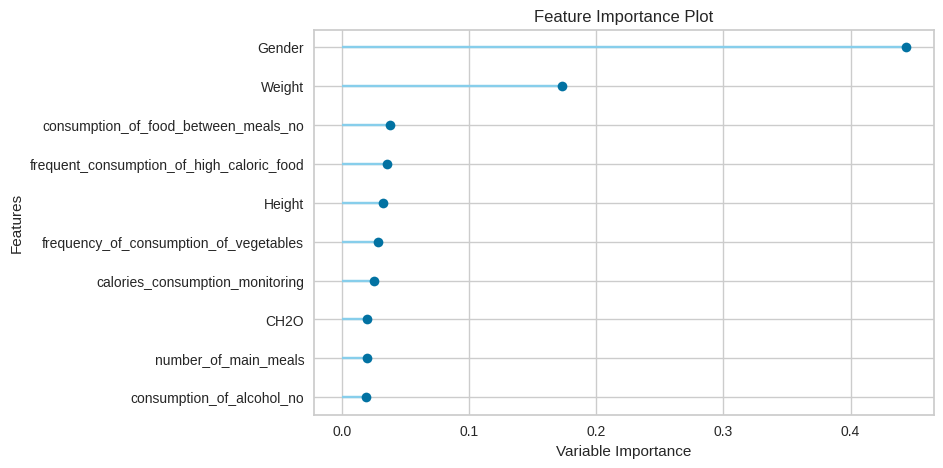

In [17]:
from pycaret.classification import plot_model

# Plot the feature importance of the finalized model
plot_model(final_xgboost_model, plot='feature')


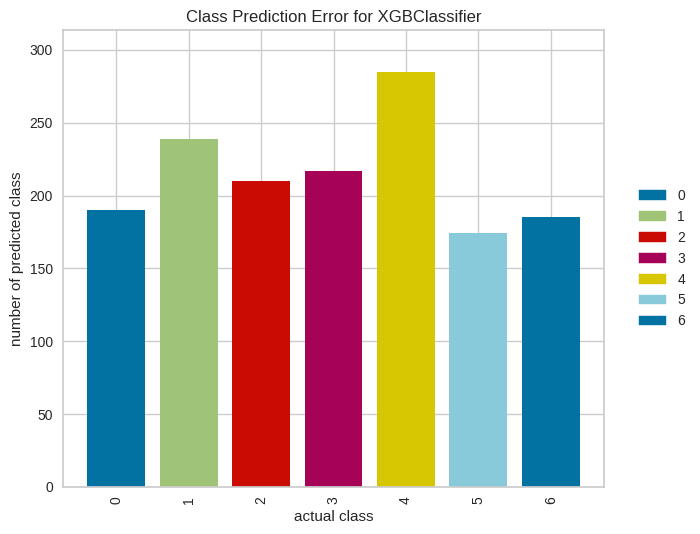

In [18]:
plot_model(final_xgboost_model, plot='error')

In [19]:
print(predictions.head())

   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443010  1.699998   81.669952                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165752                            yes   
3   3  Female  20.952738  1.710730  131.274857                            yes   
4   4    Male  31.641081  1.914186   93.798058                            yes   

  frequent_consumption_of_high_caloric_food  \
0                                       yes   
1                                       yes   
2                                       yes   
3                                       yes   
4                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  \
0                                2.000000              2.983297   
1                                2.000000              3.000000   
2                            

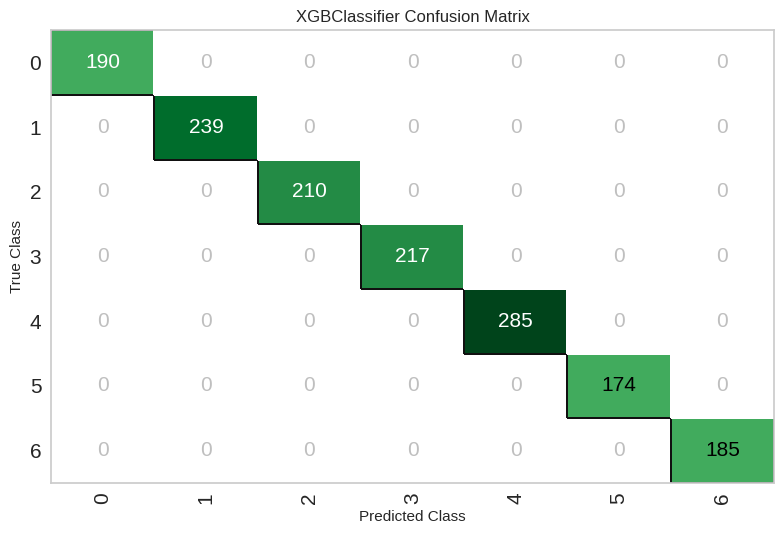

In [20]:
# Plot the confusion matrix
plot_model(final_xgboost_model, plot='confusion_matrix')


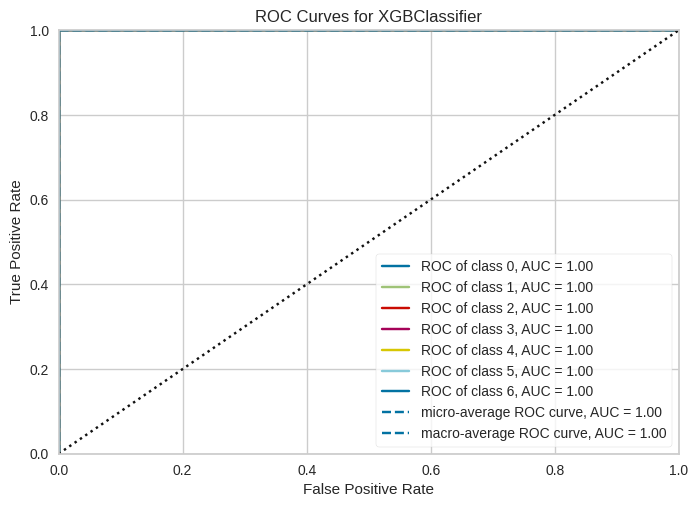

In [21]:

# Plot the ROC curve
plot_model(final_xgboost_model, plot='auc')

In [22]:
# Create and train the XGBoost model with correct num_class parameter
xgboost_model = create_model('xgboost', num_class=3)  # Assuming 3 classes in your dataset


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8886,0.9864,0.8886,0.8917,0.8886,0.8695,0.8700
1,0.8743,0.9839,0.8743,0.8771,0.8747,0.8526,0.8530
2,0.8686,0.9831,0.8686,0.8665,0.8663,0.8460,0.8464
3,0.8857,0.9862,0.8857,0.8871,0.8860,0.8661,0.8662
4,0.8943,0.9916,0.8943,0.8945,0.8937,0.8761,0.8763
5,0.8971,0.9890,0.8971,0.8998,0.8976,0.8795,0.8797
6,0.9000,0.9892,0.9000,0.8997,0.8991,0.8828,0.8831
7,0.8914,0.9876,0.8914,0.8929,0.8916,0.8728,0.8729
8,0.8657,0.9850,0.8657,0.8662,0.8652,0.8426,0.8429


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Description,Value
0,Session id,42
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4999, 29)"
6,Transformed train set shape,"(3499, 29)"
7,Transformed test set shape,"(1500, 29)"
8,Numeric features,9
9,Categorical features,8


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9904,0.9000,0.8999,0.8994,0.8828,0.8829
1,0.8886,0.9837,0.8886,0.8895,0.8886,0.8694,0.8696
2,0.8971,0.9887,0.8971,0.8980,0.8944,0.8794,0.8802
3,0.9143,0.9913,0.9143,0.9157,0.9142,0.8995,0.8997
4,0.8857,0.9863,0.8857,0.8938,0.8851,0.8661,0.8677
5,0.8743,0.9887,0.8743,0.8780,0.8741,0.8527,0.8533
6,0.8686,0.9847,0.8686,0.8695,0.8684,0.8461,0.8463
7,0.8714,0.9854,0.8714,0.8718,0.8695,0.8491,0.8498
8,0.9000,0.9897,0.9000,0.9011,0.9000,0.8828,0.8829


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


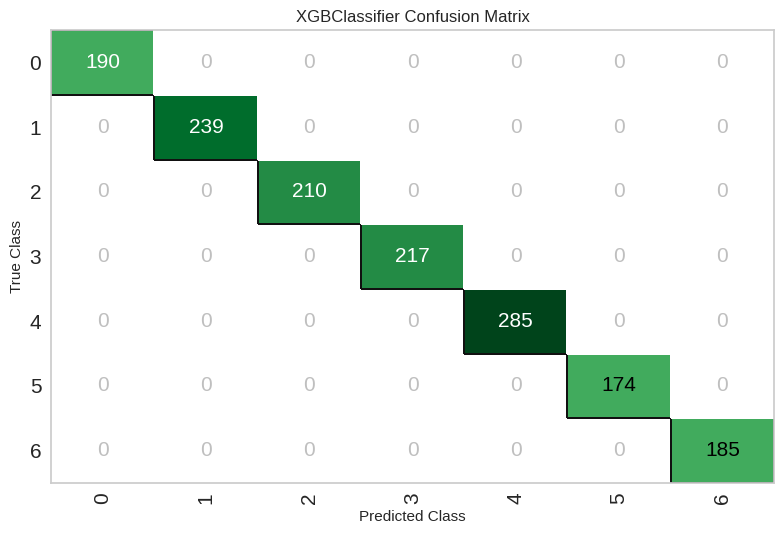

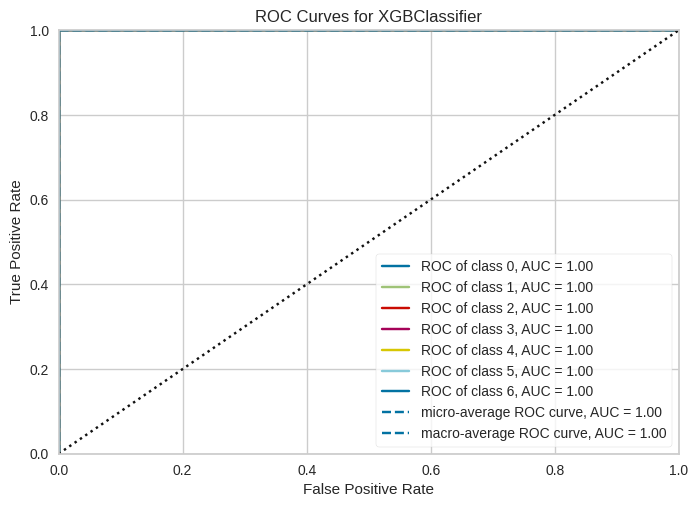

In [23]:
# Step 1: Ensure all necessary imports are done
from pycaret.classification import setup, create_model, finalize_model, save_model, load_model, predict_model, plot_model

# Step 2: Setup PyCaret with the correct target column name and other configurations
s = setup(data=data, target='obesity_level', experiment_name='obesity_prediction', session_id=42)

# Step 3: Create and train the XGBoost model
xgboost_model = create_model('xgboost')

# Step 4: Finalize the model (train on the entire dataset)
final_xgboost_model = finalize_model(xgboost_model)

# Step 5: Save the model for future use
save_model(final_xgboost_model, 'final_xgboost_model')

# Step 6: Load the saved model
saved_xgboost_model = load_model('final_xgboost_model')

# Step 7: Make predictions on new data
predictions = predict_model(saved_xgboost_model, data=new_data)

# Step 8: Save predictions to CSV
predictions.to_csv('predictions.csv', index=False)


# Step 10: Generate and display various visualizations

# Plot the confusion matrix
plot_model(final_xgboost_model, plot='confusion_matrix')

# Plot the ROC curve
plot_model(final_xgboost_model, plot='auc')



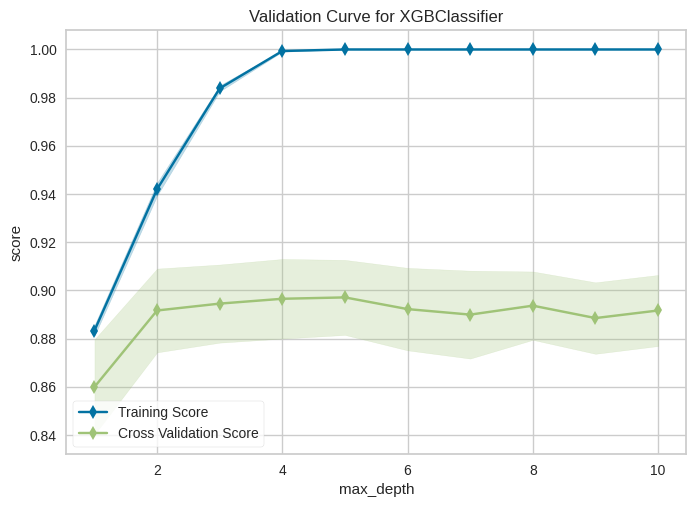

In [24]:

# Plot the validation curve
plot_model(final_xgboost_model, plot='vc')


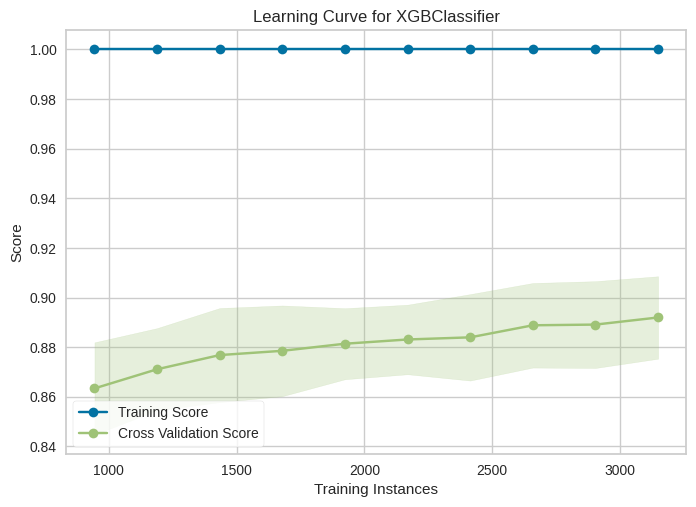

In [25]:
plot_model(final_xgboost_model, plot='learning')


TRAINING

In [26]:
predictions=predict_model(final_xgboost_model,data=new_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
import pandas as pd
from pycaret.classification import load_model, predict_model

# Load the test data from the CSV file
test_data_path = '/mnt/data/test_modified.csv'
test_data = pd.read_csv(test_data_path)

# Ensure the column names match the model's expectations (rename if necessary)
# Example: Assuming 'consumption_of_water_daily' should be 'CH2O'
test_data.rename(columns={'consumption_of_water_daily': 'CH2O'}, inplace=True)

# Load the trained XGBoost model
saved_xgboost_model = load_model('final_xgboost_model')

# Make predictions on the test data
predictions = predict_model(saved_xgboost_model, data=test_data)

# Save the predictions to a new CSV file
predictions.to_csv('/mnt/data/test_predictions.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('/mnt/data/test_predictions.csv')


In [28]:
print("Test Data Columns:", test_data.columns.tolist())


Test Data Columns: ['id', 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'frequent_consumption_of_high_caloric_food', 'frequency_of_consumption_of_vegetables', 'number_of_main_meals', 'consumption_of_food_between_meals', 'SMOKE', 'consumption_of_water_daily', 'calories_consumption_monitoring', 'physical_activity_frequency', 'time_using_technology_devices', 'consumption_of_alcohol', 'transportation_used']


In [29]:
# Assuming 'consumption_of_water_daily' should be 'CH2O'
test_data.rename(columns={'consumption_of_water_daily': 'CH2O'}, inplace=True)


In [40]:
# Make predictions on the test data
test_predictions = predict_model(saved_xgboost_model, data=test_data)

# Save the predictions to a new CSV file
test_predictions.to_csv('/content/test_modified.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('/content/test_modified.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>